In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
%matplotlib inline

# READ THE FILE AND GENERATE INPUT AND OUTPUT ARRAYS #

inputs=[]
o=[]

with open('pseudo_data_square.csv', newline='') as f:
    reader=csv.reader(f, delimiter='\t')
    for line in reader:
        temp_input=[float(line[0]),float(line[1])]
        inputs.append(temp_input)
        o.append(float(line[2]))

x_train=np.array(inputs[0:250])
y_train=np.array(o[0:250])

model = Sequential()
model.add(Dense(1, activation='sigmoid', use_bias=True, input_dim=2))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3000, batch_size=32, verbose=0)

250/250 [==============================] - 0s 389us/step
[0.034330293774604795, 0.9959999918937683]


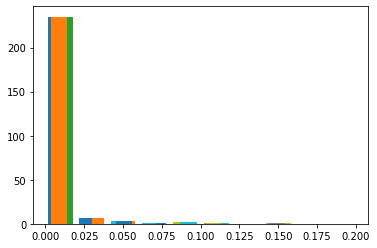

In [59]:
x_test= np.array(inputs[250:500])
expected= np.array(o[250:500])

classes = model.predict(x_test, batch_size=32)

evaluation = model.evaluate(x_test, expected, batch_size=32)
print(evaluation)

for n in range(len(expected)):
    prediction_error[n]=0.5*(expected[n]-classes[n])**2

plt.hist(prediction_error, range=(0,0.2))
plt.show()